In [1]:
import tensorflow as tf
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

Reading and Displaying a random image from the dataset

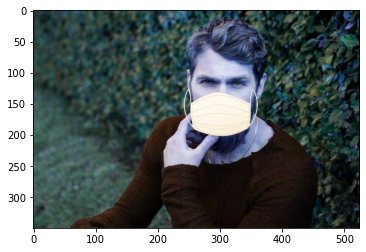

In [2]:
img_array = cv.imread('train/train/with_mask/0-with-mask.jpg')   #reading in a random img from dataset
plt.imshow(img_array)  #BGR

Converting from BGR to RGB

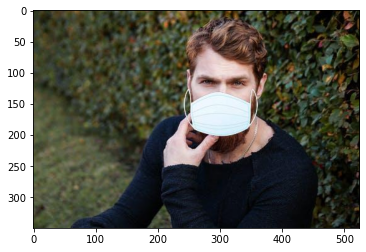

In [3]:
plt.imshow(cv.cvtColor(img_array,cv.COLOR_BGR2RGB))

In [4]:
img_array.shape

(350, 525, 3)

Going through the entire directory and displaying the 1st image

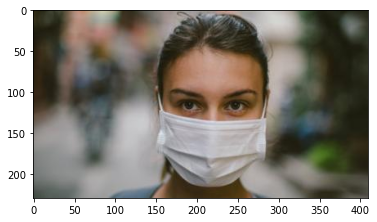

In [5]:
data_dir = 'train/train/'  #dataset
classes = ['with_mask','without_mask']
for category in classes:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img))
        plt.imshow(cv.cvtColor(img_array,cv.COLOR_BGR2RGB))
        plt.show
        break
    break   #will show first img in with_mask folder

Creating the training data

In [6]:
img_size = 150  
training_data = []

def create_train():
    for category in classes:
        path = os.path.join(data_dir, category)
        class_num = classes.index(category)  #0 or 1 (labels)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
#will read all the images inside the folders,will resize and then append to the list along with class index                                    

In [7]:
create_train()

In [8]:
print(len(training_data))

1315


In [9]:
print(training_data)

[[array([[[18, 40, 45],
        [19, 40, 43],
        [18, 37, 40],
        ...,
        [23, 37, 35],
        [23, 37, 35],
        [23, 37, 35]],

       [[20, 42, 47],
        [19, 40, 43],
        [19, 38, 41],
        ...,
        [26, 39, 37],
        [25, 39, 37],
        [24, 38, 36]],

       [[21, 43, 48],
        [20, 41, 44],
        [20, 39, 42],
        ...,
        [29, 43, 41],
        [27, 41, 39],
        [25, 39, 37]],

       ...,

       [[69, 76, 66],
        [71, 79, 69],
        [74, 82, 72],
        ...,
        [66, 73, 76],
        [67, 75, 78],
        [68, 76, 79]],

       [[66, 75, 65],
        [69, 77, 67],
        [72, 80, 70],
        ...,
        [77, 84, 87],
        [76, 83, 86],
        [75, 82, 85]],

       [[66, 74, 64],
        [69, 76, 67],
        [71, 79, 69],
        ...,
        [87, 94, 97],
        [85, 92, 95],
        [84, 90, 93]]], dtype=uint8), 0], [array([[[156, 170, 192],
        [158, 172, 194],
        [155, 171, 194],
        .

In [10]:
#shuffling training data to prevent overfitting
import random
random.shuffle(training_data)

In [11]:
#training_data list contains both img and labels, so we now seperate these 2 into 2 seperate lists
X = []  #data
y = []  #labels

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [12]:
X.shape

(1315, 150, 150, 3)

In [13]:
y = np.array(y)

In [14]:
print(y)

[1 1 0 ... 0 1 0]


In [15]:
#normalizing the data:
X = X/255.0

In [16]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X)

Creating Deep Learning Model

In [17]:
#Initializing CNN
cnn=tf.keras.models.Sequential()

In [18]:
#Adding First Convolution Layer and applying Max Pooling
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
#2nd Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [20]:
#3rd Convolution Layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [22]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [23]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [24]:
#Output Layer
cnn.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [25]:
#Compiling CNN
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [ ]:
cnn.fit(X, y, epochs=10, validation_split=0.1)

Epoch 1/10
37/37 [==============================] - 26s 661ms/step - loss: 0.4765 - accuracy: 0.7785 - val_loss: 0.2020 - val_accuracy: 0.9242
Epoch 2/10
37/37 [==============================] - 24s 650ms/step - loss: 0.1416 - accuracy: 0.9442 - val_loss: 0.0962 - val_accuracy: 0.9470
Epoch 3/10
37/37 [==============================] - 23s 630ms/step - loss: 0.1295 - accuracy: 0.9594 - val_loss: 0.0966 - val_accuracy: 0.9470
Epoch 4/10
37/37 [==============================] - 23s 615ms/step - loss: 0.1009 - accuracy: 0.9670 - val_loss: 0.0585 - val_accuracy: 0.9697
Epoch 5/10
37/37 [==============================] - 25s 671ms/step - loss: 0.0619 - accuracy: 0.9780 - val_loss: 0.0559 - val_accuracy: 0.9773
Epoch 6/10
37/37 [==============================] - 24s 658ms/step - loss: 0.0556 - accuracy: 0.9806 - val_loss: 0.1066 - val_accuracy: 0.9621
Epoch 7/10
37/37 [==============================] - 24s 657ms/step - loss: 0.0522 - accuracy: 0.9856 - val_loss: 0.0756 - val_accuracy: 0.9621

In [ ]:
cnn.save('my_model.h5')

In [ ]:
#model = tf.keras.models.load_model(my_model.h5)

Checking the network for Predictions

In [ ]:
test_image = cv.imread('test/test/without_mask/159.jpg')

In [ ]:
plt.imshow(cv.cvtColor(test_image,cv.COLOR_BGR2RGB))

In [ ]:
#applying necassary transformations to test_image before feeding into network
test_image = cv.resize(test_image, (150,150))
test_image = np.expand_dims(test_image,axis = 0)   #need 4th dimension
test_image = test_image/255.0

In [ ]:
prediction = cnn.predict(test_image)

In [ ]:
prediction   #without mask gives greater than 0.5

In [ ]:
test_image1 = cv.imread('test/test/with_mask/23-with-mask.jpg')

In [ ]:
plt.imshow(cv.cvtColor(test_image1,cv.COLOR_BGR2RGB))

In [ ]:
#applying necassary transformations to test_image before feeding into network
test_image1 = cv.resize(test_image1, (150,150))
test_image1 = np.expand_dims(test_image1,axis = 0)   #need 4th dimension
test_image1 = test_image1/255.0

In [ ]:
prediction1 = cnn.predict(test_image1)

In [ ]:
prediction1   #with mask gives less than 0.5

Using haar cascades

In [ ]:
faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
test_image2 = cv.imread('test/test/without_mask/276.jpg')

In [ ]:
gray = cv.cvtColor(test_image2, cv.COLOR_BGR2GRAY)

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)   
for (x,y,w,h) in faces:    
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = test_image2[y:y+h,x:x+w]
        cv.rectangle(test_image2, (x,y), (x+w,y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("No face detected")
        #else:
        #    for (ex,ey,ew,eh) in facess:   #cropping
        #        face_roi = roi_color[ey:ey+eh,ex:ex+ew]

In [ ]:
plt.imshow(cv.cvtColor(test_image2,cv.COLOR_BGR2RGB))

In [ ]:
#applying necassary transformations to test_image before feeding into network
test_image2 = cv.resize(test_image2, (150,150))
test_image2 = np.expand_dims(test_image2,axis = 0)   #need 4th dimension
test_image2 = test_image2/255.0

In [ ]:
prediction2 = cnn.predict(test_image2)

In [ ]:
prediction2

In [ ]:
test_image3 = cv.imread('test/test/with_mask/106-with-mask.jpg')

In [ ]:
gray = cv.cvtColor(test_image3, cv.COLOR_BGR2GRAY)

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)   
for (x,y,w,h) in faces:    
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = test_image3[y:y+h,x:x+w]
        cv.rectangle(test_image3, (x,y), (x+w,y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("No face detected")

In [ ]:
plt.imshow(cv.cvtColor(test_image3,cv.COLOR_BGR2RGB))

In [ ]:
#applying necassary transformations to test_image before feeding into network
test_image3 = cv.resize(test_image3, (150,150))
test_image3 = np.expand_dims(test_image3,axis = 0)   #need 4th dimension
test_image3 = test_image3/255.0

In [ ]:
prediction3 = cnn.predict(test_image3)

In [ ]:
prediction3

Detection Using Real time Video

In [ ]:
path = 'haarcascade_frontalface_default.xml'

rectangle_bgr = (255,255,255)  #rectangle bgr to white
img = np.zeros((500,500))    #blank image

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret,frame = cap.read()
    faceCascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)   
    for (x,y,w,h) in faces:    
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("No face detected")
     
    final_image = cv.resize(frame, (150,150))
    final_image = np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    pred = cnn.predict(final_image)
    
    if pred<0.5:
        status='Mask'
        cv.putText(frame,status,(100,150),cv.FONT_HERSHEY_SIMPLEX,3,(255,0,255),2,cv.LINE_4)
        
        
    else:
        status='No Mask'
        cv.putText(frame,status,(100,150),cv.FONT_HERSHEY_SIMPLEX,3,(0,255,255),2,cv.LINE_4)
        
    cv.imshow('Face Mask Detection',frame)
    if cv.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()
      
    